In [2]:
from qiskit import pulse

with pulse.build(name='my_example') as my_program:
    pass
    my_program

In [4]:
from qiskit.pulse import DriveChannel

channel = DriveChannel(0)

In [6]:
from qiskit.providers.fake_provider import FakeValencia

backend = FakeValencia()

with pulse.build(backend=backend, name='backend_aware') as backend_aware_program:
    channel = pulse.drive_channel(0)
    print(pulse.num_qubits())
    

5


In [7]:
with pulse.build(backend) as delay_5dt:
    pulse.delay(5, channel)

In [9]:
#with pulse.build() as sched:
    #pulse.play(pulse, channel)

from qiskit.pulse import library

amp = 1
sigma = 10
num_samples = 128

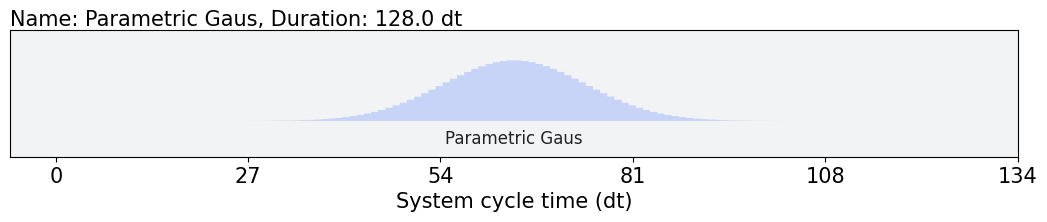

In [10]:
gaus = pulse.library.Gaussian(num_samples, amp, sigma, name="Parametric Gaus")
gaus.draw()

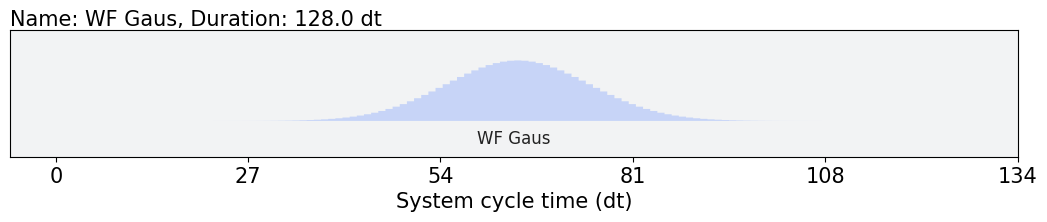

In [12]:
import numpy as np

times = np.arange(num_samples)
gaussian_samples = np.exp(-1/2 *((times - num_samples / 2) ** 2 / sigma**2))

gaus = library.Waveform(gaussian_samples, name="WF Gaus")
gaus.draw()

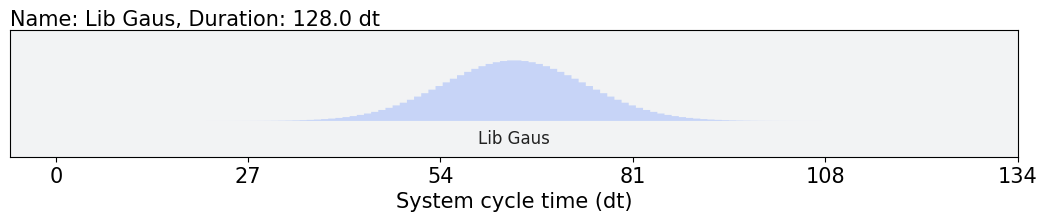

In [14]:
gaus = library.gaussian(duration=num_samples, amp=amp, sigma=sigma, name="Lib Gaus")
gaus.draw()

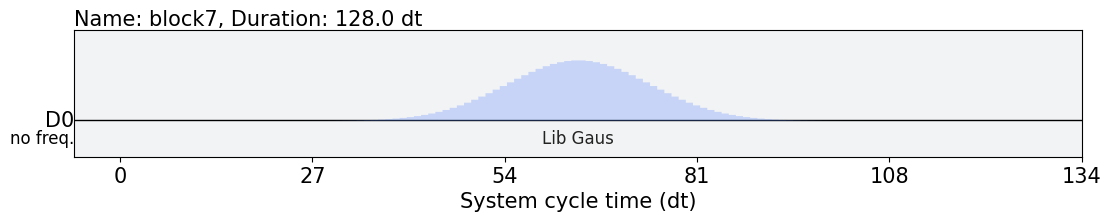

In [17]:
with pulse.build() as schedule:
    pulse.play(gaus, channel)
schedule.draw()

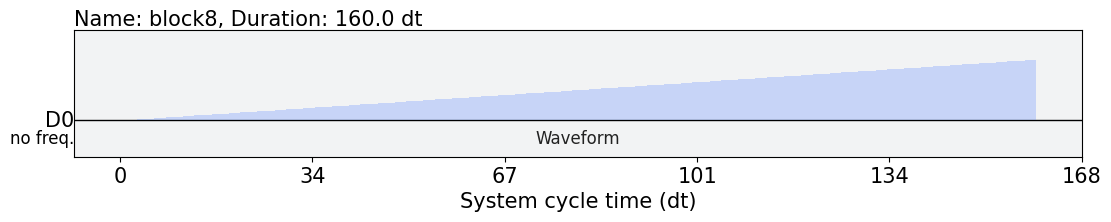

In [18]:
with pulse.build() as schedule:
    pulse.play([0.001*i for i in range(160)], channel)
schedule.draw()

In [19]:
with pulse.build(backend) as schedule:
    pulse.set_frequency(4.5e9, channel)

In [20]:
with pulse.build(backend) as schedule:
    pulse.shift_phase(np.pi, channel)

In [21]:
from qiskit.pulse import Acquire, AcquireChannel, MemorySlot

with pulse.build(backend) as schedule:
    pulse.acquire(1200, pulse.acquire_channel(0), MemorySlot(0))

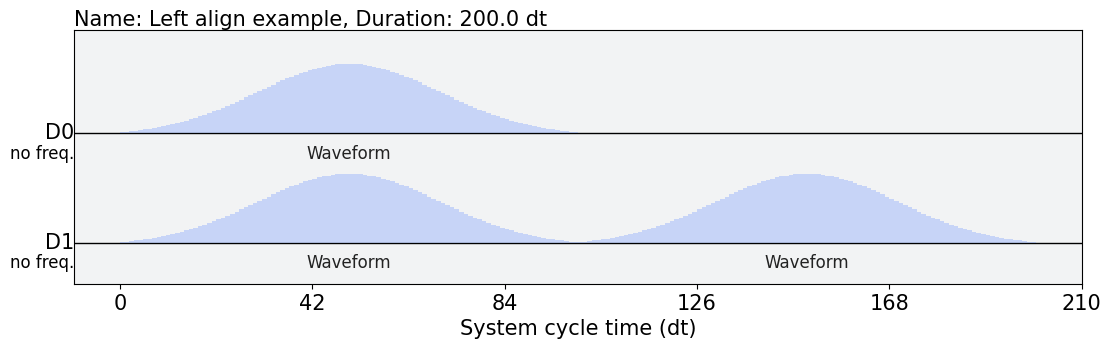

In [22]:
with pulse.build(backend, name='Left align example') as program:
    with pulse.align_left():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()
# 上のパルスにはスケジューリングの自由度がないことに注意してください。2 番目の波形は最初の波形の直後に始まります。 

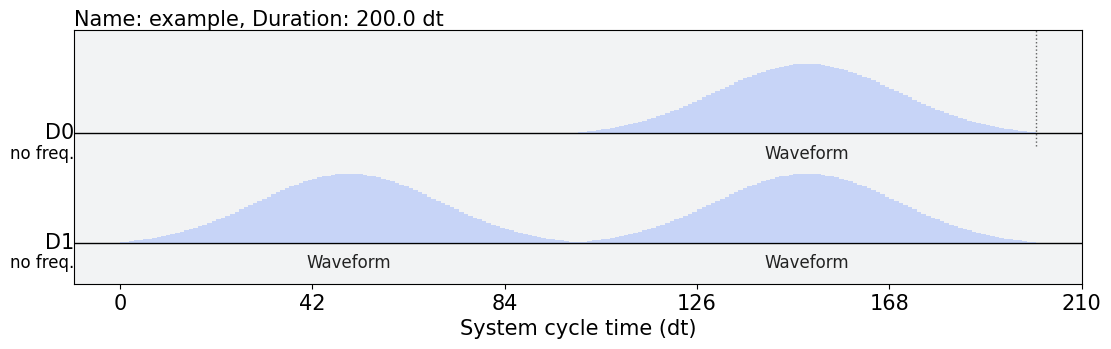

In [24]:
with pulse.build(backend, name='example') as program:
    gaussian_pulse = library.gaussian(100, 0.5, 20)
    with pulse.align_equispaced(2*gaussian_pulse.duration):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))
    pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

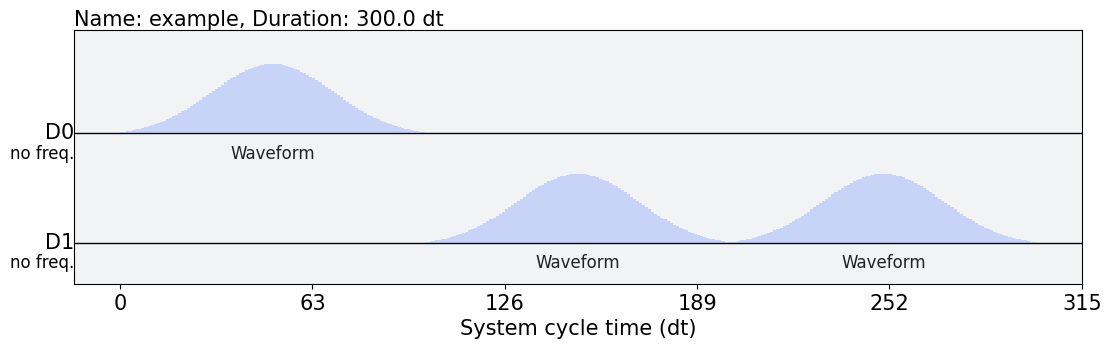

In [26]:
with pulse.build(backend, name='example') as program:
    with pulse.align_sequential():
        gaussian_pulse = library.gaussian(100, 0.5, 20)
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))
        pulse.play(gaussian_pulse, pulse.drive_channel(1))

program.draw()

In [27]:
with pulse.build(backend, name='Offset example') as program:
    with pulse.phase.offset(3.14, pulse.drive_channel(0)):
        pulse.play(gaussian_pulse, pulse.drive_channel(0))
        with pulse.frequency_offset(10e6, pulse.drive_channel(0)):
            pulse.play(gaussian_pulse, pulse.drive_channel(0))

program.draw(9)

AttributeError: module 'qiskit.pulse' has no attribute 'phase'